# Relatório: Análise de Dados do INEP

## Introdução

Nesse trabalho desenvolvido para o curso de Álgebra Linear, encontraremos um modelo linear para as notas do IDEB de cada unidade federativa brasileira. Em seguida, será analisado se o modelo é devidamente ajustado aos dados, utilizando $R^{2}$.  Assim, poderá ser analisado quais estados tiveram maiores taxas de crescimento na educação. Ao fazer a regressão linear para encontrar tal modelo, utilizaremos o Método dos Mínimos Quadrados(MMQ), que explicaremos adiante, desenvolvido pelo famoso matemático Carl Friedrich Gauss, em 1795.

Sobre os métodos que serão utilizados:

Ao fazermos a regressão linear, encontraremos um modelo da forma $b_i =Dt_i+C$, onde $b_i$ será a nota em função de $t_i$, o ano. Tendo os pontos $(t_i,b_i)$, a solução utilizando mínimos quadrados, técnica de otimização para obter o melhor ajuste de dados ao minimizar a soma dos erros quadrados(SEQ), sendo erro=e, é dada por:
$$e=\displaystyle\sum_{i=1}^{n} (y(t_i)-b_i)^{2}=\displaystyle\sum_{i=1}^{n} (C+ Dt_i-b_i)^{2}$$

Sendo: $A=\begin{bmatrix}
1 & t_1\\
\vdots & \vdots \\
1 & t_n
\end{bmatrix}$ $b=\begin{bmatrix}
b_1\\
\vdots\\
b_n
\end{bmatrix}$ $\hat x=\begin{bmatrix}
C\\
D
\end{bmatrix}$

$e=\|Ax-b||^{2}\Rightarrow$
 $\hat x = (A^{T}A)^{-1}A^{T}b\Rightarrow A^{T}A\hat x =A^{T}b$

$A^{T}A = \begin{bmatrix}
    m & \displaystyle\sum_{i=1}^{n} t_i\\
    \displaystyle\sum_{i=1}^{n} t_i & \displaystyle\sum_{i=1}^{n} t_i^{2}
    \end{bmatrix}$

$A^{T}b=\begin{bmatrix}
    \displaystyle\sum_{i=1}^{n} b_i\\
    \displaystyle\sum_{i=1}^{n} t_ib_i
    \end{bmatrix} $

## Análise dos Dados

### Importando bibliotecas

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [94]:
params = {'legend.fontsize': 20,
          'figure.figsize': (4, 3),
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':20,
         'ytick.labelsize':20}

plt.style.use('ggplot')
    
plt.rcParams.update(params)

### Coletando os dados

In [30]:
data = pd.read_excel('ideb.xlsx').dropna()
print(data)


    Ano   AC   AL   AP   AM   BA   CE   DF   ES   GO  ...   PI   RJ   RN   RS  \
0  2005  3.4  3.2  3.2  3.1  2.7  3.2  4.8  4.2  4.1  ...  2.8  4.3  2.7  4.3   
1  2007  3.8  3.3  3.4  3.6  3.4  3.8  5.0  4.6  4.3  ...  3.5  4.4  3.4  4.6   
2  2009  4.3  3.7  3.8  3.9  3.8  4.4  5.6  5.1  4.9  ...  4.0  4.7  3.9  4.9   
3  2011  4.6  3.8  4.1  4.3  4.2  4.9  5.7  5.2  5.3  ...  4.4  5.1  4.1  5.1   
4  2013  5.1  4.1  4.0  4.7  4.3  5.2  5.9  5.4  5.7  ...  4.5  5.2  4.4  5.6   
5  2015  5.4  4.7  4.5  5.2  4.7  5.9  6.0  5.7  5.8  ...  4.9  5.5  4.8  5.7   
6  2017  5.8  5.2  4.6  5.4  5.1  6.2  6.3  6.0  6.1  ...  5.3  5.8  5.0  5.8   
7  2019  5.9  5.6  4.9  5.5  5.3  6.4  6.5  6.1  6.2  ...  5.7  5.8  5.2  6.0   

    RO   RR   SC   SP   SE   TO  
0  3.6  3.7  4.4  4.7  3.0  3.5  
1  4.0  4.1  4.9  5.0  3.4  4.1  
2  4.3  4.3  5.2  5.5  3.8  4.5  
3  4.7  4.7  5.8  5.6  4.1  4.9  
4  5.2  5.0  6.0  6.1  4.4  5.1  
5  5.4  5.2  6.3  6.4  4.6  5.1  
6  5.8  5.5  6.5  6.6  4.9  5.6 

In [31]:
data.describe()

,Ano,AC,AL,AP,AM,BA,CE,DF,ES,GO,...,PI,RJ,RN,RS,RO,RR,SC,SP,SE,TO
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2012.000000,4.787500,4.200000,4.062500,4.462500,4.187500,5.000000,5.725000,5.287500,5.300000,...,4.387500,5.100000,4.187500,5.250000,4.825000,4.775000,5.700000,5.825000,4.162500,4.800000
std,4.898979,0.918753,0.881557,0.590248,0.886305,0.872496,1.152637,0.589794,0.659951,0.798212,...,0.947836,0.590399,0.847581,0.616441,0.801338,0.702546,0.785584,0.744024,0.730826,0.730949
min,2005.000000,3.400000,3.200000,3.200000,3.100000,2.700000,3.200000,4.800000,4.200000,4.100000,...,2.800000,4.300000,2.700000,4.300000,3.600000,3.700000,4.400000,4.700000,3.000000,3.500000
25%,2008.500000,4.175000,3.600000,3.700000,3.825000,3.700000,4.250000,5.450000,4.975000,4.750000,...,3.875000,4.625000,3.775000,4.825000,4.225000,4.250000,5.125000,5.375000,3.700000,4.400000
50%,2012.000000,4.850000,3.950000,4.050000,4.500000,4.250000,5.050000,5.800000,5.300000,5.500000,...,4.450000,5.150000,4.250000,5.350000,4.950000,4.850000,5.900000,5.850000,4.250000,5.000000
75%,2015.500000,5.500000,4.825000,4.525000,5.250000,4.800000,5.975000,6.075000,5.775000,5.875000,...,5.000000,5.575000,4.850000,5.725000,5.450000,5.275000,6.350000,6.450000,4.675000,5.225000
max,2019.000000,5.900000,5.600000,4.900000,5.500000,5.300000,6.400000,6.500000,6.100000,6.200000,...,5.700000,5.800000,5.200000,6.000000,5.800000,5.700000,6.500000,6.700000,5.100000,5.600000



### ACRE

Text(0.5, 1.0, 'ACRE')

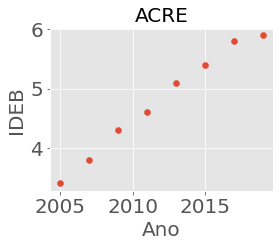

In [95]:
AC = data['AC'].values
Ano = data['Ano'].values
plt.figure()
plt.scatter(Ano, AC)
plt.xlabel('Ano')
plt.ylabel('IDEB')
plt.title('ACRE')

Text(0.5, 1.0, 'ACRE')

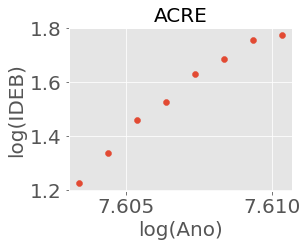

In [96]:
plt.figure()
plt.scatter(np.log(Ano), np.log(AC))
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('ACRE')

In [38]:
t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AC)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

In [39]:
x_hat

array([-614.31078896,   80.96086954])

In [40]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

In [41]:
MSE = np.mean((least_square - b)**2)

print('MSE: ', MSE)

MSE:  0.001028979631956777


In [42]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

No handles with labels found to put in legend.


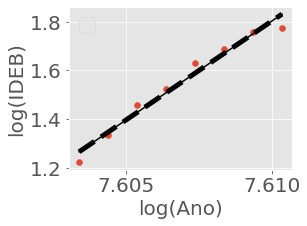

In [99]:
fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.legend()

In [44]:
previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))

IDEB estimado:  6.756740697318955


# ALAGOAS

Text(0.5, 1.0, 'ALAGOAS')

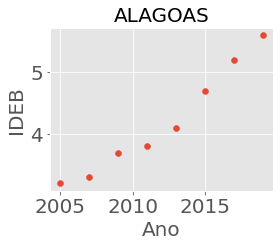

In [100]:
AL = data['AL'].values
Ano = data['Ano'].values
plt.figure()
plt.scatter(Ano, AL)
plt.xlabel('Ano')
plt.ylabel('IDEB')
plt.title('ALAGOAS')

Text(0.5, 1.0, 'ALAGOAS')

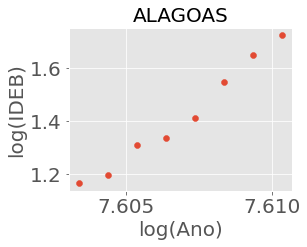

In [101]:
plt.figure()
plt.scatter(np.log(Ano), np.log(AL))
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('ALAGOAS')

In [47]:
t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AL)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

In [48]:
x_hat

array([-634.82686484,   83.64046765])

In [49]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

In [50]:
MSE = np.mean((least_square - b)**2)

print('MSE: ', MSE)

MSE:  0.0008306036634302037


In [51]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

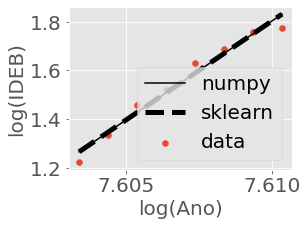

In [102]:
fig, ax = plt.subplots()
plt.scatter(t, b, label='data')
plt.plot(t_linspace, least_square_plot, color='k', label='numpy')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', label='sklearn', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.legend()

In [103]:
previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))

IDEB estimado:  6.756740697318955


# AMAPÁ

Text(0.5, 1.0, 'AMAPÁ')

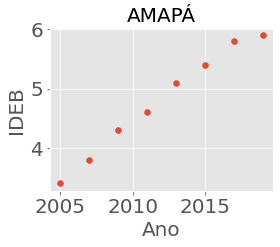

In [104]:
AP = data['AP'].values
Ano = data['Ano'].values
plt.figure()
plt.scatter(Ano, AC)
plt.xlabel('Ano')
plt.ylabel('IDEB')
plt.title('AMAPÁ')

Text(0.5, 1.0, 'AMAPA')

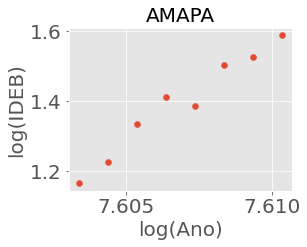

In [105]:
plt.figure()
plt.scatter(np.log(Ano), np.log(AP))
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('AMAPA')

In [56]:
t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AC)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

In [57]:
x_hat

array([-614.31078896,   80.96086954])

In [58]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

In [59]:
MSE = np.mean((least_square - b)**2)

print('MSE: ', MSE)

MSE:  0.001028979631956777


In [60]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

No handles with labels found to put in legend.


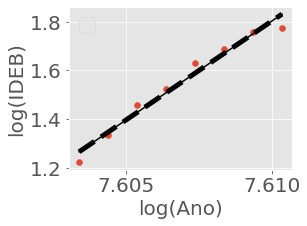

In [107]:
fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.legend()

In [62]:
previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))

IDEB estimado:  6.756740697318955


# AMAZONAS

Text(0.5, 1.0, 'AMAZONAS')

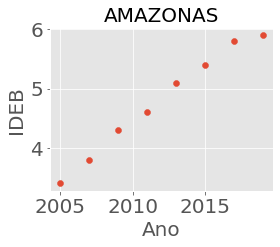

In [108]:
AM = data['AM'].values
Ano = data['Ano'].values
plt.figure()
plt.scatter(Ano, AC)
plt.xlabel('Ano')
plt.ylabel('IDEB')
plt.title('AMAZONAS')

Text(0.5, 1.0, 'AMAZONAS')

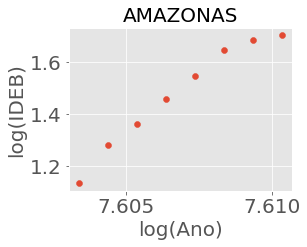

In [109]:
plt.figure()
plt.scatter(np.log(Ano), np.log(AM))
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('AMAZONAS')

In [65]:
t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AC)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

In [66]:
x_hat

array([-614.31078896,   80.96086954])

In [67]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

In [68]:
MSE = np.mean((least_square - b)**2)

print('MSE: ', MSE)

MSE:  0.001028979631956777


In [69]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

No handles with labels found to put in legend.


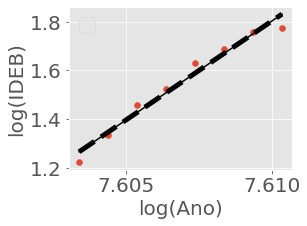

In [111]:
fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.legend()

In [71]:
previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))

IDEB estimado:  6.756740697318955


# BAHIA

Text(0.5, 1.0, 'BAHIA')

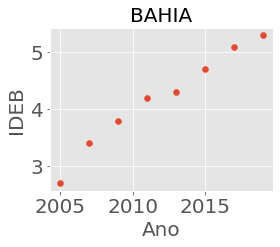

In [112]:
BA = data['BA'].values
Ano = data['Ano'].values
plt.figure()
plt.scatter(Ano, BA)
plt.xlabel('Ano')
plt.ylabel('IDEB')
plt.title('BAHIA')

Text(0.5, 1.0, 'BAHIA')

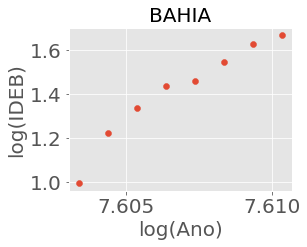

In [113]:
plt.figure()
plt.scatter(np.log(Ano), np.log(BA))
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('BAHIA')

In [74]:
t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AC)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

In [75]:
x_hat

array([-614.31078896,   80.96086954])

In [76]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

In [77]:
MSE = np.mean((least_square - b)**2)

print('MSE: ', MSE)

MSE:  0.001028979631956777


In [78]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

No handles with labels found to put in legend.


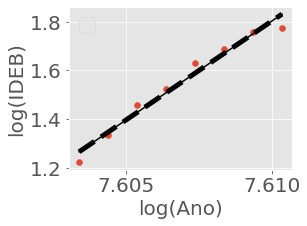

In [114]:
fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.legend()

In [80]:
previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))

IDEB estimado:  6.756740697318955


# CEARÁ

In [119]:
CE = data['CE'].values
Ano = data['Ano'].values


In [120]:
t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AC)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)
x_hat

array([-614.31078896,   80.96086954])

In [84]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

In [85]:
MSE = np.mean((least_square - b)**2)

print('MSE: ', MSE)

MSE:  0.001028979631956777


In [86]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

No handles with labels found to put in legend.


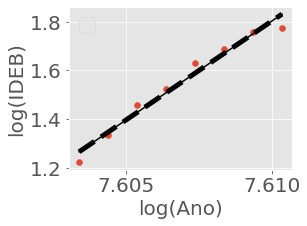

In [118]:
fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.legend()

In [88]:
previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))

IDEB estimado:  6.756740697318955
